<a href="https://colab.research.google.com/github/Apple03244/CodingTest/blob/main/TensorBoard_%26tuningipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model Load

In [1]:
import google.colab as colab

In [3]:
! unzip /content/titanic_predictor.zip

Archive:  /content/titanic_predictor.zip
   creating: content/titanic_predictor/
  inflating: content/titanic_predictor/keras_metadata.pb  
   creating: content/titanic_predictor/assets/
 extracting: content/titanic_predictor/fingerprint.pb  
   creating: content/titanic_predictor/variables/
  inflating: content/titanic_predictor/variables/variables.index  
  inflating: content/titanic_predictor/variables/variables.data-00000-of-00001  
  inflating: content/titanic_predictor/saved_model.pb  


In [4]:
import tensorflow as tf
import tensorflow.keras as tk

In [5]:
predictor=tk.models.load_model("/content/content/titanic_predictor")

In [6]:
!pip install -q -U tensorboard-plugin-profile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 12.8 MB/s eta 0:00:00


### Needs

텐서보드를 활성화 하려면 프로그램을 수정하여 이벤트 파일이라고 특별한 이진로그 파일에 시각화하려는 데이터를 출력해야함

다행히 `tensorflow.keras.callbacks.TensorBoard` 메소드가 자동으로 위의 필요과정을 진행해준다

In [7]:
clone_predictor=tk.models.clone_model(predictor)

### 모델 구조 살피기

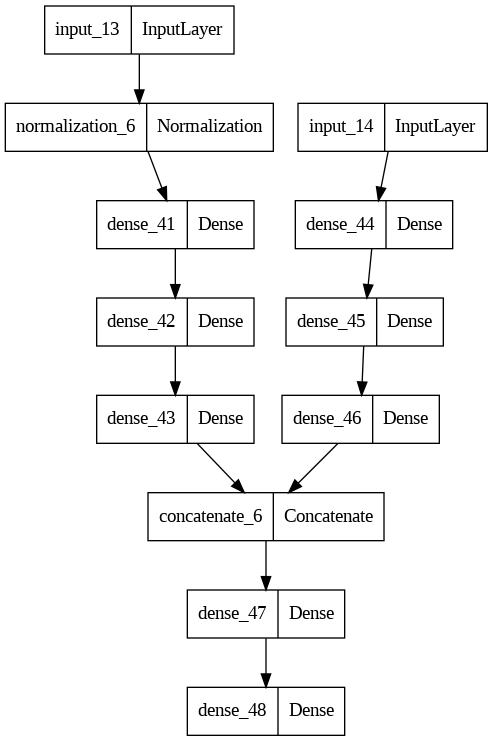

In [8]:
tk.utils.plot_model(clone_predictor)

### 모델을 수정해보자

In [9]:
files=colab.files.upload()

Saving kaggle.json to kaggle.json


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic
!unzip /content/titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 1.62MB/s]
Archive:  /content/titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [11]:
import pandas as pd
train=pd.read_csv("/content/train.csv")
test=pd.read_csv("/content/test.csv")
submission=pd.read_csv("/content/gender_submission.csv")

## hyper Parameter tuning

by unsing `Keras Tuner`

장점 : 텐서보드와의 연동성이 굉장히 좋음

따라서 튜닝 후 tensorboard로 시각화해보는 것을 목표로 하겠다

In [13]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.7 MB/s eta 0:00:00


In [14]:
import keras_tuner as kt
import joblib

In [15]:
preprocessing=joblib.load('/content/preprocessing_pipeline.pkl')

AttributeError: Can't get attribute 'passth' on <module '__main__'>

In [ ]:
help(kt.HyperParameters)

Help on class HyperParameters in module keras_tuner.src.engine.hyperparameters.hyperparameters:

class HyperParameters(builtins.object)
 |  Container for both a hyperparameter space, and current values.
 |  
 |  A `HyperParameters` instance can be pass to `HyperModel.build(hp)` as an
 |  argument to build a model.
 |  
 |  To prevent the users from depending on inactive hyperparameter values, only
 |  active hyperparameters should have values in `HyperParameters.values`.
 |  
 |  Attributes:
 |      space: A list of `HyperParameter` objects.
 |      values: A dict mapping hyperparameter names to current values.
 |  
 |  Methods defined here:
 |  
 |  Boolean(self, name, default=False, parent_name=None, parent_values=None)
 |      Choice between True and False.
 |      
 |      Args:
 |          name: A string. the name of parameter. Must be unique for each
 |              `HyperParameter` instance in the search space.
 |          default: Boolean, the default value to return for the pa